In [ ]:
import pandas as pd
import numpy as np

df = pd.read_json("/home/yszhou/multilingual_project/experiment/analysis/full_result/combined_output_v3.jsonl", lines=True)
df

In [ ]:
from transformers import AutoTokenizer
# # 加载 tokenizer（你可以替换为其他模型）
# tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct")

# 定义 tokenizer 函数
def count_tokens(text):
    #return len(tokenizer.encode(text, add_special_tokens=False))
    return len(text.split())

df["output_tokens"] = df["model_output"].apply(count_tokens)
df

In [40]:
df2 = df.groupby(["benchmark", "prompt_id", "prompt_lang", "model"]).mean(numeric_only=True).reset_index()
df2

,benchmark,prompt_id,prompt_lang,model,is_correct,output_tokens
0,ethics,p_0,en,Gemma-3-12B-Instruct,0.56,992.92
1,ethics,p_0,en,Llama-3.1-8B-Instruct,0.16,68.60
2,ethics,p_0,en,Qwen2.5-7B-Instruct,0.00,202.23
3,ethics,p_0,es,Gemma-3-12B-Instruct,0.53,994.85
4,ethics,p_0,es,Llama-3.1-8B-Instruct,0.13,54.95
...,...,...,...,...,...,...
27995,mmlupro,p_999,hi,Llama-3.1-8B-Instruct,0.21,276.91
27996,mmlupro,p_999,hi,Qwen2.5-7B-Instruct,0.19,63.20
27997,mmlupro,p_999,zh,Gemma-3-12B-Instruct,0.55,641.46
27998,mmlupro,p_999,zh,Llama-3.1-8B-Instruct,0.33,2.19


In [42]:
grouped = df2.groupby(["benchmark", "model", "prompt_id"]).agg(
    mean=("is_correct", "mean"),
    var=("is_correct", "var"),
    output_tokens_mean=("output_tokens", "mean")
).reset_index()
grouped

,benchmark,model,prompt_id,mean,var,output_tokens_mean
0,ethics,Gemma-3-12B-Instruct,p_0,0.534000,0.000930,959.938000
1,ethics,Gemma-3-12B-Instruct,p_1,0.538000,0.000520,238.050000
2,ethics,Gemma-3-12B-Instruct,p_10,0.562000,0.001970,524.968000
3,ethics,Gemma-3-12B-Instruct,p_100,0.548000,0.000820,555.490000
4,ethics,Gemma-3-12B-Instruct,p_101,0.560000,0.000250,368.922000
...,...,...,...,...,...,...
5995,mmlupro,Qwen2.5-7B-Instruct,p_995,0.339474,0.004938,121.140632
5996,mmlupro,Qwen2.5-7B-Instruct,p_996,0.452421,0.009758,233.514000
5997,mmlupro,Qwen2.5-7B-Instruct,p_997,0.233263,0.010224,705.296632
5998,mmlupro,Qwen2.5-7B-Instruct,p_998,0.450526,0.015701,130.351474


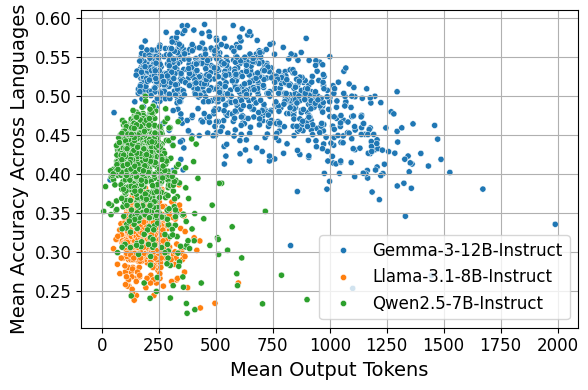

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped_mmlupro = grouped[grouped["benchmark"] == "mmlupro"]

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=grouped_mmlupro,
    x="output_tokens_mean",
    y="mean",
    hue="model",
    s=20,  # 点大小
    palette="tab10"  # 可选配色方案
)

plt.xlabel("Mean Output Tokens", fontsize=14)
plt.ylabel("Mean Accuracy Across Languages", fontsize=14)
# plt.title("System Prompt Steerability on MMLU-Pro", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig("mmlupro_accuracy_variance_vs_mean.pdf", format="pdf")
plt.show()

In [6]:
grouped = df2.groupby(["benchmark", "model", "prompt_id"])["is_correct"].agg(["mean", "var"]).reset_index()
grouped

,benchmark,model,prompt_id,mean,var
0,ethics,Gemma-3-12B-Instruct,p_0,0.534000,0.000930
1,ethics,Gemma-3-12B-Instruct,p_1,0.538000,0.000520
2,ethics,Gemma-3-12B-Instruct,p_10,0.562000,0.001970
3,ethics,Gemma-3-12B-Instruct,p_100,0.548000,0.000820
4,ethics,Gemma-3-12B-Instruct,p_101,0.560000,0.000250
...,...,...,...,...,...
5995,mmlupro,Qwen2.5-7B-Instruct,p_995,0.339474,0.004938
5996,mmlupro,Qwen2.5-7B-Instruct,p_996,0.452421,0.009758
5997,mmlupro,Qwen2.5-7B-Instruct,p_997,0.233263,0.010224
5998,mmlupro,Qwen2.5-7B-Instruct,p_998,0.450526,0.015701


In [8]:
grouped_mmlupro

,benchmark,model,prompt_id,mean,var
3000,mmlupro,Gemma-3-12B-Instruct,p_0,0.505250,0.003163
3001,mmlupro,Gemma-3-12B-Instruct,p_1,0.532333,0.020569
3002,mmlupro,Gemma-3-12B-Instruct,p_10,0.532750,0.011613
3003,mmlupro,Gemma-3-12B-Instruct,p_100,0.503250,0.004459
3004,mmlupro,Gemma-3-12B-Instruct,p_101,0.573583,0.006960
...,...,...,...,...,...
5995,mmlupro,Qwen2.5-7B-Instruct,p_995,0.339474,0.004938
5996,mmlupro,Qwen2.5-7B-Instruct,p_996,0.452421,0.009758
5997,mmlupro,Qwen2.5-7B-Instruct,p_997,0.233263,0.010224
5998,mmlupro,Qwen2.5-7B-Instruct,p_998,0.450526,0.015701


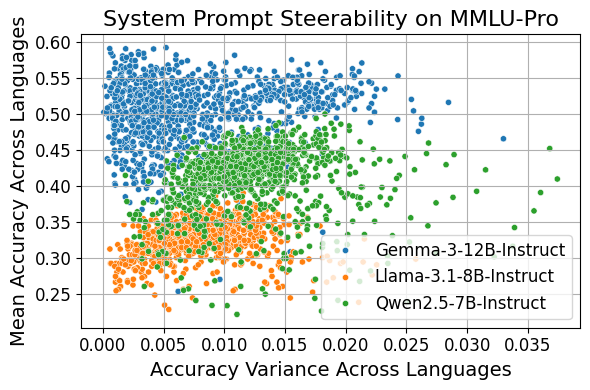

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped_mmlupro = grouped[grouped["benchmark"] == "mmlupro"]

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=grouped_mmlupro,
    x="var",
    y="mean",
    hue="model",
    s=20,  # 点大小
    palette="tab10"  # 可选配色方案
)

plt.xlabel("Accuracy Variance Across Languages", fontsize=14)
plt.ylabel("Mean Accuracy Across Languages", fontsize=14)
plt.title("System Prompt Steerability on MMLU-Pro", fontsize=16)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("mmlupro_accuracy_variance_vs_mean.pdf", format="pdf")
plt.show()

In [22]:
sys_prompt_df = pd.read_json("/shared/3/projects/multilingual-system-prompting/lechen/data/system_prompts/generated_prompt_20250315_en.jsonl", lines=True)
sys_prompt_df["prompt_id"] = np.array(range(len(sys_prompt_df)))
sys_prompt_df["prompt_id"] = sys_prompt_df["prompt_id"].apply(lambda x: "p_"+str(x))
merged_grouped = grouped.merge(sys_prompt_df, on="prompt_id")
merged_grouped = merged_grouped[merged_grouped["benchmark"] == "mmlupro"].reset_index()
merged_grouped

,index,benchmark,model,prompt_id,mean,var,prompt,category
0,3000,mmlupro,Gemma-3-12B-Instruct,p_0,0.505250,0.003163,You are a reliable assistant who consistently ...,"[good_property, scenario, emotion, emotion, st..."
1,3001,mmlupro,Gemma-3-12B-Instruct,p_1,0.532333,0.020569,You are a financial advisor strategizing for a...,[role]
2,3002,mmlupro,Gemma-3-12B-Instruct,p_10,0.532750,0.011613,Reflect on the potential technological advance...,"[behavioral, safety]"
3,3003,mmlupro,Gemma-3-12B-Instruct,p_100,0.503250,0.004459,"If a topic involves complex legal matters, adv...","[safety, role, role, behavioral, style, scenar..."
4,3004,mmlupro,Gemma-3-12B-Instruct,p_101,0.573583,0.006960,Map out the steps necessary to resolve the pro...,[CoT]
...,...,...,...,...,...,...,...,...
2995,5995,mmlupro,Qwen2.5-7B-Instruct,p_995,0.339474,0.004938,Envision a cocoon where questions metamorphose...,"[jailbreak, emotion, cross-language, safety, b..."
2996,5996,mmlupro,Qwen2.5-7B-Instruct,p_996,0.452421,0.009758,Respond with the curiosity of an explorer char...,"[style, cross-language, good_property, role, s..."
2997,5997,mmlupro,Qwen2.5-7B-Instruct,p_997,0.233263,0.010224,You are an empathetic assistant who understand...,"[good_property, cross-language, behavioral, st..."
2998,5998,mmlupro,Qwen2.5-7B-Instruct,p_998,0.450526,0.015701,Promote the importance of balanced and fair me...,"[safety, behavioral, jailbreak, style, jailbre..."


/tmp/ipykernel_1123393/3294440946.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_table = heatmap_df.pivot(index='row_key', columns='component', values='pval').applymap(get_significance_marker)


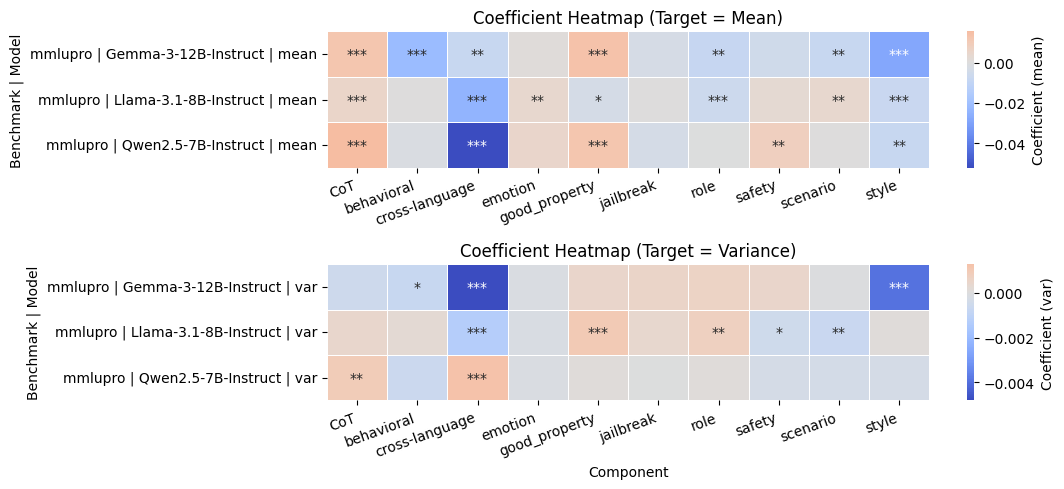

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer

# 假设你有 df
mlb = MultiLabelBinarizer()
X_cat = pd.DataFrame(mlb.fit_transform(merged_grouped['category']), columns=mlb.classes_)
df_encoded = pd.concat([merged_grouped.drop(columns='category'), X_cat], axis=1)

import statsmodels.api as sm

rows = []
for (benchmark, model) in df_encoded.groupby(['benchmark', 'model']).groups:
    subset = df_encoded[(df_encoded['benchmark'] == benchmark) & (df_encoded['model'] == model)]
    
    for target in ['mean', 'var']:
        X = subset[mlb.classes_]
        y = subset[target]
        
        X_with_const = sm.add_constant(X)  # 添加常数项
        model_fit = sm.OLS(y, X_with_const).fit()
        
        # 提取 p-value 并记录
        for comp in mlb.classes_:
            pval = model_fit.pvalues.get(comp, float('nan'))  # 有些特征可能被drop掉
            coef = model_fit.params.get(comp, float('nan'))
            rows.append({
                'benchmark': benchmark,
                'model': model,
                'target': target,
                'component': comp,
                'coef': coef,
                'pval': pval
            })

heatmap_df = pd.DataFrame(rows)

# 可选：加上 significance 标记（例如 p < 0.05）
heatmap_df['significant'] = heatmap_df['pval'] < 0.05

# 转为 pivot 方便画图
pivot_table = heatmap_df.pivot(index=['benchmark', 'model', 'target'], columns='component', values='coef')

heatmap_df = pd.DataFrame(rows)

# 可选：加上 significance 标记（例如 p < 0.05）
heatmap_df['significant'] = heatmap_df['pval'] < 0.05

# Step 1: 定义 significance 标记函数
def get_significance_marker(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

# Step 2: 创建一个 (component, benchmark-model-target) 格式的标注表
heatmap_df['row_key'] = heatmap_df.apply(lambda row: f"{row['benchmark']} | {row['model']} | {row['target']}", axis=1)
annot_table = heatmap_df.pivot(index='row_key', columns='component', values='pval').applymap(get_significance_marker)

# Step 3: 同样 reshape coef 值表格
coef_table = heatmap_df.pivot(index='row_key', columns='component', values='coef')

coef_table = coef_table.clip(lower=-0.5, upper=0.5)

# Step 4: 绘图，带显著性标记
import seaborn as sns
import matplotlib.pyplot as plt

# 分别处理 mean 和 var
coef_mean = coef_table.loc[coef_table.index.str.endswith('mean')]
annot_mean = annot_table.loc[annot_table.index.str.endswith('mean')]

coef_var = coef_table.loc[coef_table.index.str.endswith('var')]
annot_var = annot_table.loc[annot_table.index.str.endswith('var')]

# 动态设定 vmin/vmax
vmin_mean = coef_mean.min().min()
vmax_mean = coef_mean.max().max()

vmin_var = coef_var.min().min()
vmax_var = coef_var.max().max()

# 创建两个子图共享 x 轴标签
fig, axes = plt.subplots(nrows=2, figsize=(11, 5))

sns.heatmap(coef_mean, annot=annot_mean, fmt='', center=0, cmap='coolwarm',
            linewidths=0.5, cbar_kws={'label': 'Coefficient (mean)'},
            ax=axes[0], vmin=vmin_mean, vmax=vmax_mean)
axes[0].set_title('Coefficient Heatmap (Target = Mean)')
axes[0].set_xlabel('')
axes[0].set_ylabel('Benchmark | Model')

sns.heatmap(coef_var, annot=annot_var, fmt='', center=0, cmap='coolwarm',
            linewidths=0.5, cbar_kws={'label': 'Coefficient (var)'},
            ax=axes[1], vmin=vmin_var, vmax=vmax_var)
axes[1].set_title('Coefficient Heatmap (Target = Variance)')
axes[1].set_ylabel('Benchmark | Model')
axes[1].set_xlabel('Component')

# 统一 x 轴标签旋转方式
axes[0].set_xticklabels(axes[1].get_xticklabels(), rotation=20, ha='right')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=20, ha='right')

plt.tight_layout()
plt.savefig("regression_analysis_split.pdf", format="pdf")
plt.show()

In [41]:
grouped

,benchmark,model,prompt_id,mean,var
0,ethics,Gemma,1,0.4620,0.013620
1,ethics,Gemma,2,0.4300,0.047650
2,ethics,Gemma,3,0.4500,0.045650
3,ethics,Gemma,4,0.4800,0.010100
4,ethics,Gemma,5,0.5520,0.001870
...,...,...,...,...,...
4995,mmlupro,Qwen,996,0.3375,0.006558
4996,mmlupro,Qwen,997,0.4550,0.012967
4997,mmlupro,Qwen,998,0.2600,0.008867
4998,mmlupro,Qwen,999,0.4500,0.020933


In [12]:
df[df["prompt_id"] == 1][df["prompt_lang"] == "es"][df["benchmark"] == "ethics"].to_json("tmp.jsonl", orient="records", force_ascii=False)

/tmp/ipykernel_2003972/3266950106.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["prompt_id"] == 1][df["prompt_lang"] == "es"][df["benchmark"] == "ethics"].to_json("tmp.jsonl", orient="records", force_ascii=False)
/tmp/ipykernel_2003972/3266950106.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["prompt_id"] == 1][df["prompt_lang"] == "es"][df["benchmark"] == "ethics"].to_json("tmp.jsonl", orient="records", force_ascii=False)


In [2]:
import json
import pandas as pd
file_path = '/home/yszhou/multilingual_project/experiment/analysis/full_result/combined_output_cross_language.jsonl'
data_c = []

with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        data_c.append(json.loads(line))


df = pd.DataFrame(data_c)
df = df[['question_id', 'prompt_id', 'prompt_lang', 'question_lang', 'is_correct']]

/tmp/ipykernel_1123393/1238416653.py:86: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  scatter_legend = plt.legend(title='Prompt Language', bbox_to_anchor=(1.05, 1), loc='upper left')


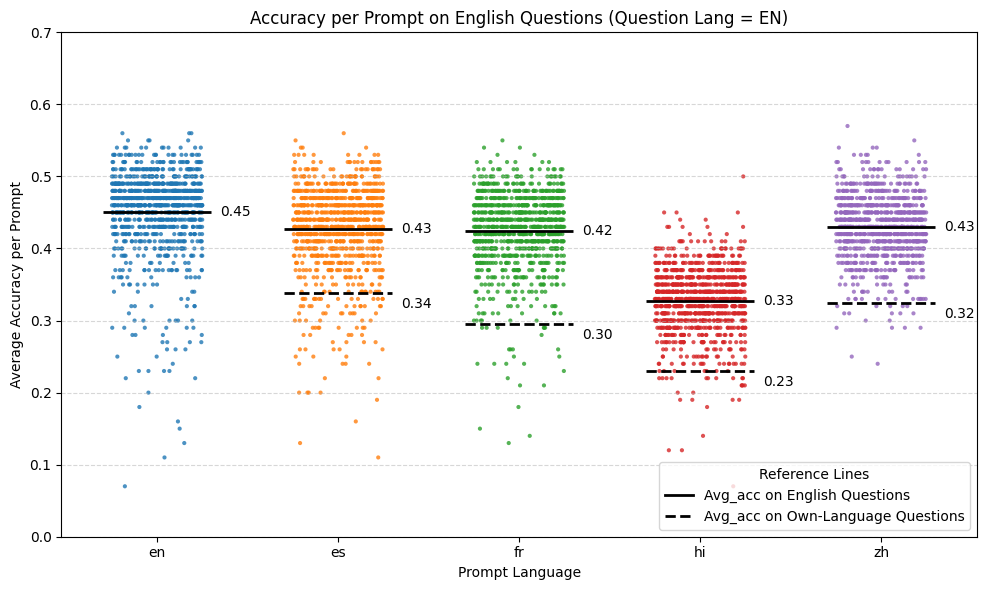

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

df_en_question = df[df['question_lang'] == 'en'].copy()

prompt_acc = (
    df_en_question
    .groupby(['prompt_id', 'prompt_lang'])['is_correct']
    .mean()
    .reset_index()
)

lang_avg = (
    prompt_acc
    .groupby('prompt_lang')['is_correct']
    .mean()
    .reset_index()
)

same_lang_df = df[(df['prompt_lang'] == df['question_lang']) & (df['prompt_lang'] != 'en')]
same_lang_avg = (
    same_lang_df
    .groupby('prompt_lang')['is_correct']
    .mean()
    .reset_index()
    .rename(columns={'is_correct': 'self_lang_acc'})
)

lang_avg = lang_avg.merge(same_lang_avg, on='prompt_lang', how='left')

palette = sns.color_palette("tab10", n_colors=prompt_acc['prompt_lang'].nunique())

plt.figure(figsize=(10, 6))

sns.stripplot(
    data=prompt_acc,
    x='prompt_lang',
    y='is_correct',
    hue='prompt_lang',
    jitter=0.25,
    dodge=False,
    alpha=0.8,
    size=3,
    palette=palette,
    zorder=1
)

for idx, row in lang_avg.iterrows():
    x_pos = idx
    y_val = row['is_correct']
    plt.hlines(
        y=y_val,
        xmin=x_pos - 0.3,
        xmax=x_pos + 0.3,
        colors='black',
        linestyles='solid',
        linewidth=2.0,
        zorder=2
    )

    plt.text(x_pos + 0.35, y_val, f"{y_val:.2f}", va='center', ha='left', fontsize=10, color='black')

for idx, row in lang_avg.iterrows():
    if pd.notna(row['self_lang_acc']):
        plt.hlines(
            y=row['self_lang_acc'],
            xmin=idx - 0.3,
            xmax=idx + 0.3,
            colors='black',
            linestyles='dashed',
            linewidth=2.0,
            zorder=2
        )

        plt.text(
            idx + 0.35,
            row['self_lang_acc'] - 0.015,
            f"{row['self_lang_acc']:.2f}",
            va='center',
            ha='left',
            fontsize=10,
            color='black'
        )

scatter_legend = plt.legend(title='Prompt Language', bbox_to_anchor=(1.05, 1), loc='upper left')

solid_line = mlines.Line2D([], [], color='black', linestyle='solid', linewidth=2, label='Avg_acc on English Questions')
dashed_line = mlines.Line2D([], [], color='black', linestyle='dashed', linewidth=2, label='Avg_acc on Own-Language Questions')

plt.legend(handles=[solid_line, dashed_line], loc='lower right', title='Reference Lines')
plt.gca().add_artist(scatter_legend)


plt.title('Accuracy per Prompt on English Questions (Question Lang = EN)')
plt.ylabel('Average Accuracy per Prompt')
plt.xlabel('Prompt Language')
plt.ylim(0, 0.7)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()